In [137]:
%matplotlib inline
import easyaccess as ea
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
sns.set(color_codes=True)

In [77]:
con=ea.connect('desoper')

Connecting to DB ** desoper ** ...


In [124]:
q="""select 
distinct(TILENAME) as tilename,
avg(ra_cent) as ra,
avg(dec_cent) as dec,
avg(rac1) as ra1,
avg(rac2) as ra2,
avg(rac3) as ra3,
avg(rac4) as ra4,
avg(decc1) as dec1,
avg(decc2) as dec2,
avg(decc3) as dec3,
avg(decc4) as dec4
from {table} group by tilename;"""

In [125]:
df_y3=con.query_to_pandas(q.format(table='COADD'))

In [127]:
df_sv=con.query_to_pandas('select * from MCARRAS2.SVA1_TILES')

In [130]:
df_y1=con.query_to_pandas('select * from MCARRAS2.Y1A1_TILES')

In [133]:
def cr(x):
    if x > 200: return x-360
    else: return x
def pol(df):
    x=[]
    y=[]
    for i in [1,2,3,4,1]:
        #print(df['RA'+str(i)])
        x.append(cr(df['RA'+str(i)]))
        y.append(df['DEC'+str(i)])
    return x,y

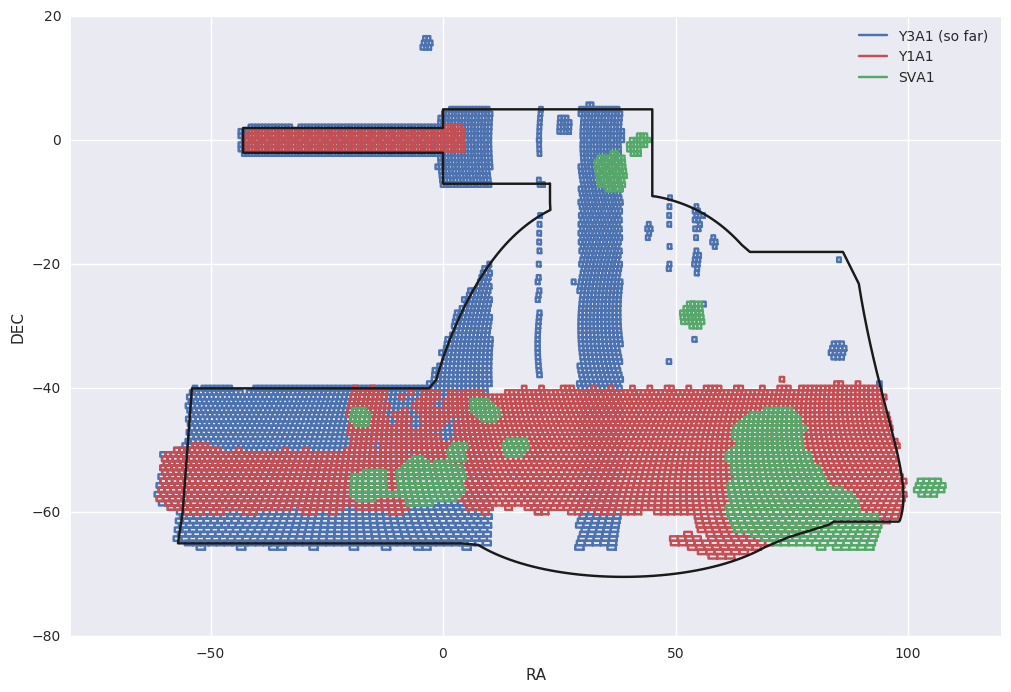

In [138]:
raf,decf=np.loadtxt('round13-poly.txt',unpack=True)
plt.figure(figsize=(12,8))
for i in range(len(df_y3)):
    plt.plot(*pol(df_y3.ix[i]),color='b')
for i in range(len(df_y1)):
    plt.plot(*pol(df_y1.ix[i]),color='r')
for i in range(len(df_sv)):
    plt.plot(*pol(df_sv.ix[i]),color='g')

plt.plot(*pol(df_y3.ix[0]),color='b',label='Y3A1 (so far)')
plt.plot(*pol(df_y1.ix[0]),color='r',label='Y1A1')
plt.plot(*pol(df_sv.ix[0]),color='g',label='SVA1')
plt.legend(loc=0)
plt.plot(raf,decf,color='k')
plt.xlim(-80,120)
plt.xlabel('RA')
plt.ylabel('DEC')